In [7]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [26]:
# load CSV with pandas
iris_data = pd.read_csv("../datasets/iris.csv")

#show the head of the table
print(iris_data.head())

# change string field 'Species' to a numeric representation
label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

# convert to numpy array
np_iris = iris_data.to_numpy()

# split the features of the iris from its species
features = np_iris[:,0:4]
species = np_iris[:,4]

# scale feature variables using transform this would make sure
# all vars are in a unified scale
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

# convert the target var options into a one-hot-encoding arrays like this [1., 0., 0.]
# instead of keeping it as a value ranging from 0-2
species = tf.keras.utils.to_categorical(species,3)

# split a percentage of training data from test data
features_train, feature_test, target_train, target_test = train_test_split(features, species, test_size=0.10)


   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [32]:
from tensorflow import keras

# the amount of categories in the target var
TARGET_CLASSES = 3

# create keras seq model
model = keras.models.Sequential()

# add hidden layers
for i in range(2):
    model.add(keras.layers.Dense(128,
                                input_shape=(4,),
                                name=f'Hidden-Layer-{i}',
                                activation='relu'))

# add output layer with soft
model.add(keras.layers.Dense(TARGET_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

# set loss function
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

# show info about the model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-0 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.1111 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9789 - loss: 0.1121 - val_accuracy: 1.0000 - val_loss: 0.0338
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: 0.1051 - val_accuracy: 1.0000 - val_loss: 0.0259
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0885 - val_accuracy: 1.0000 - val_loss: 0.0241
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9728 - loss: 0.0926 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9737 - loss: 0.0899 - val_accuracy: 1.0000 - val_loss: 0.0226
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9488 - loss: 0.0999 - val_accuracy: 1.0000 - val_loss: 0.0181
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9671 - loss: 0.0827 - val_accuracy: 1.0000 - val_loss: 0.0188
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9578 - loss: 0.1017 - val_accuracy: 1.0000 - val_loss: 0.0145
Epoch 9/10
8/8 ━━━

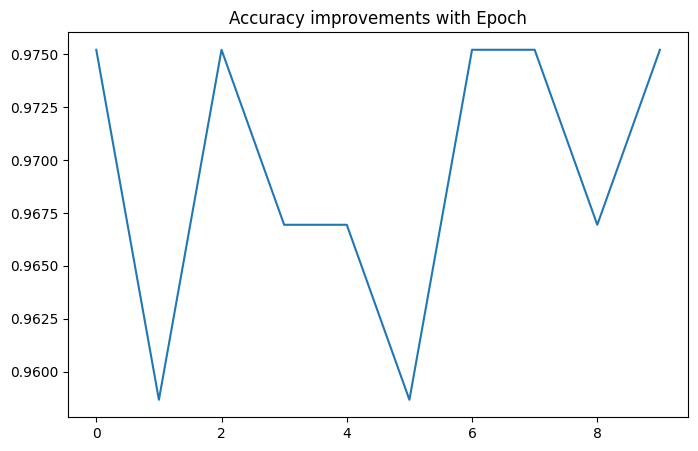

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9333 - loss: 0.2069


[0.2068522721529007, 0.9333333373069763]

In [35]:
VERBOSE = 1

# hyper parameters
BATCH_SIZE = 16
EPOCHS = 10
# use 20% of the training data for validation after epochs
VALIDATION_SPLIT=0.1

# tain the model with keras
history=model.fit(features_train,
          target_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

# evaluate the model against the test dataset and print result
model.evaluate(feature_test,target_test)

In [39]:
# save model
model.save('./iris_identifier.keras')

# load a Model
loaded_model = keras.models.load_model('./iris_identifier.keras')

# model summary
loaded_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-Layer-0 (Dense)          │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-Layer-1 (Dense)          │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-Layer (Dense)            │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

In [40]:
# new test data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

# scale the input data
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Raw Prediction Output (Probabilities) : [[5.2957668e-04 9.6187145e-01 3.7598930e-02]]
Prediction is  ['versicolor']
